# Proportionality Assessment using R and the openEBGM package

To analyse the reported proportionality ratio, we will structure the data as needed by the openEBGM  [[2]](#2) and determine the PRR. Additionally, we will use the Gamma-Poission Shrinkage model and use Empricial Bayes Geometric Mean (EBGM) to report the ratio. 

We will follow the example as presented here to achieve this :(https://cran.r-project.org/web/packages/openEBGM/vignettes/x1_introAndDataPrepVignette.html)

In [1]:
install.packages('openEBGM')
options(warn=-1)

Installing package into ‘/home/raj/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [38]:
library(openEBGM)
library(repr)

# Change plot size to 8 x 3
options(repr.plot.width=10, repr.plot.height=10,repr.plot.res = 100)

In [3]:
df<-read.csv('./data/product_event_strat.csv')

In [4]:
head(df)

,id,sex,age,var1,var2
,<int>,<chr>,<int>,<chr>,<chr>
1,0,F,NA,afinitor,Metastases to bone
2,1,F,NA,afinitor,Osteonecrosis of jaw
3,2,F,7,afinitor,Epilepsy
4,3,F,7,afinitor,Mood altered
5,4,F,7,afinitor,Stomatitis
6,5,F,NA,afinitor,Angioedema


In [5]:
df[df=='0']<- NA #sex == 0 is unknown, replace with na
df$strat_gender<- df$sex
table(df$strat_gender, useNA="always")


            F      M   <NA> 
 17512 119756  88190    596 

In [6]:
df$strat_age <- ifelse(is.na(df$age), "unknown",
                 ifelse(df$age < 18, "under_18",
                        "18_plus"))
table(df$strat_age, useNA = "always")


 18_plus under_18  unknown     <NA> 
  152489     7404    66161        0 

In [7]:
vars<-c("id", "var1","var2", "strat_gender", "strat_age") #select the columns
#remove any na
df=na.omit(df)
df=df[vars]
head(df)

,id,var1,var2,strat_gender,strat_age
,<int>,<chr>,<chr>,<chr>,<chr>
3,2,afinitor,Epilepsy,F,under_18
4,3,afinitor,Mood altered,F,under_18
5,4,afinitor,Stomatitis,F,under_18
13,12,afinitor,Eating disorder,F,18_plus
14,13,afinitor,Dysgeusia,F,18_plus
15,14,afinitor,Weight decreased,F,18_plus


We have processed the data into the right format for using the openEBGM package. We can calculate the RR and PRR for the product-event pairs.

- $N$ indicates the actual count for the cell. 
- $E$ is the expected count under the assumption of independence between rows and columns.  

When RR is 1,we observe the exact count you would expect to observe if no association exists between the two variables. When RR>1, we observe a larger count than expected. 

In [8]:
processRaw(data=df, stratify = FALSE,zeroes = FALSE)

var1,var2,N,E,RR,PRR
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
afinitor,5-hydroxyindolacetic acid increased,1,0.1583715,6.31,Inf
afinitor,Abasia,10,4.1176596,2.43,3.32
afinitor,Abdominal abscess,1,4.2760311,0.23,0.20
afinitor,Abdominal adhesions,3,2.0588298,1.46,1.59
afinitor,Abdominal compartment syndrome,1,1.5837152,0.63,0.59
afinitor,Abdominal discomfort,36,16.9457529,2.12,2.69
afinitor,ABDOMINAL DISCOMFORT,1,2.8506874,0.35,0.31
afinitor,Abdominal distension,47,22.0136416,2.14,2.71
afinitor,Abdominal hernia,5,3.9592881,1.26,1.33


Take for example the first row in the above table. Small counts cause the RR to be unstable. That is when the a single observation for a low expected counted (E=0.15), the RR becomes large. 

For this reason, we will explore Empirical Bayes approach. 

## Empirical Bayes Approach

In order to handle the issues of small counts, we will explore using the Gamma-Poisson Shrinker(GPS) model[[1]](#1). The emprical Bayes model shrinks the large RR  from small counts to a value much closer to "null hypothesis" value of 1. This shrinkage is larger for smaller counts and negligible for larger counts. 

The GPS model uses a Poisson ($\mu_{ij}$) likelihood for actual cell count $N_{ij}$ and the expected counts $E_{ij}$ are treated as constants. We are interested in the ratio $\lambda_{ij}=\frac{\mu_{ij}}{E_{ij}}$. The prior on $\lambda$ is a mixture of two gamma distributions and thus the posterior is also a mixture of two gamma distributions. The Emprical Bayes Geometric Mean(EBGM) of the posterior distribution is normally used in place of RR. Additionally, we can use the quantiles as well. We will explore them below. In the Empirical Bayes approach, the prior is driven by the data and this implies that the known posterior distribution relies on a set of hyper-parameters derived from the prior distribution. 

### Estimating Hyperparameters

The actual counts (N) and expected counts (E) are used to estimate the hyperparameters of the prior distribution. A large contingency table will have many cells, resulting in computational difficulties for the optimization routines needed for estimation. Data squashing [[1]](#1). transforms a set of 2-dimensional points to a smaller number of 3-dimensional points.For a given N, "squashing" combines points with similar Es into bins using a specified bin size and uses the average E within each bin as the E for that bin’s “superpoint”. The new superpoints are weighted by bin size. 

The hyperparameters are estimated by minimizing the negative log-likelihood function. 

 The hyperparameters are denoted by the vector θ=(α1,β1,α2,β2,P). P is the mixture fraction. Hyperparameters can be calculated by exploring the parameter space of the likelihood function using either the full data set of Ns and Es or the squashed set. 

In [9]:
processed=processRaw(data=df)
squashed <- squashData(processed) #Using defaults
head(squashed)

,N,E,weight
,<int>,<dbl>,<dbl>
1,1,0.01649012,50
2,1,0.01978815,50
3,1,0.03660807,50
4,1,0.05441740,50
5,1,0.09036586,50
6,1,0.14230198,50


**Likelihood Functions**

In [10]:
theta_init <- c(alpha1 = 0.2, beta1 = 0.1, alpha2 = 2, beta2 = 4, p = 1/3)# These values are taken from the example in the R package documentation
stats::nlm(negLLsquash, p = theta_init,
           ni = squashed$N, ei = squashed$E, wi = squashed$weight, N_star = 1)

$minimum
[1] 29891.64

$estimate
[1] 5.833327e-07 5.463338e-01 3.493601e+00 2.780298e+00 2.410744e-01

$gradient
[1] -170.392781  190.655264   -1.849722  -63.257437  433.278783

$code
[1] 2

$iterations
[1] 56

In [11]:
theta_init <- data.frame(alpha1 = c(0.2, 0.1, 0.3),
                         beta1  = c(0.1, 0.2, 0.5),
                         alpha2 = c(2,   10,  6),
                         beta2  = c(4,   10,  6),
                         p      = c(1/3, 0.2, 0.5)
)

In [12]:
squashed2 <- squashData(squashed, count = 2, bin_size = 10, keep_pts = 50)
system.time(
hyper_estimates_squashed <- autoHyper(data = squashed2, theta_init = theta_init)
)

   user  system elapsed 
  4.948   0.000   4.948 

In [13]:
hyper_estimates_squashed

guess_num,a1_hat,b1_hat,a2_hat,b2_hat,p_hat,code,converge,in_bounds,minimum
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<dbl>
1,1.078247e-07,0.3882112,4.584348,3.72061,0.2291864,0,TRUE,TRUE,29851.95
2,1.091860e+00,1.3919670,35.640278,21.23790,0.6764025,0,TRUE,TRUE,29833.21
3,1.091860e+00,1.3919668,35.640446,21.23800,0.6764027,0,TRUE,TRUE,29833.21


In [14]:
exploreHypers(data = squashed2, theta_init = theta_init, std_errors = TRUE)

$estimates
  guess_num       a1_hat    b1_hat    a2_hat   b2_hat     p_hat code converge
1         1 1.078247e-07 0.3882112  4.584348  3.72061 0.2291864    0     TRUE
2         2 1.091860e+00 1.3919670 35.640278 21.23790 0.6764025    0     TRUE
3         3 1.091860e+00 1.3919668 35.640446 21.23800 0.6764027    0     TRUE
  in_bounds  minimum
1      TRUE 29851.95
2      TRUE 29833.21
3      TRUE 29833.21

$std_errs
  guess_num      a1_se      b1_se    a2_se    b2_se       p_se
1         1         NA         NA       NA       NA         NA
2         2 0.05488192 0.05198806 6.908189 3.866345 0.01783129
3         3 0.05488263 0.05198844 6.908578 3.866567 0.01783169

In [15]:
(theta_hat <- hyper_estimates_squashed$estimates)


alpha1      beta1     alpha2      beta2          P 
 1.0918601  1.3919668 35.6404464 21.2380041  0.6764027

In [16]:
#Qn() correspond to the probability that λ came from the first component of the posterior mixture
qn <- Qn(theta_hat, N = processed$N, E = processed$E)#calculates the mixture fractions for the posterior distributions.
head(qn)

[1] 0.5058921 0.3285210 0.9772625 0.4812032 0.7354905 0.2723937

In [17]:
identical(length(qn), nrow(processed))# Qn output should match the number of rows in the original data

[1] TRUE

In [18]:
#EBGM  is a measure of central tendency of the posterior distributions, λij|N=n
processed$ebgm <- ebgm(theta_hat, N = processed$N, E = processed$E, qn  = qn)
head(processed)

,var1,var2,N,E,RR,PRR,ebgm
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,afinitor,5-hydroxyindolacetic acid increased,1,0.1583715,6.31,Inf,1.32
2,afinitor,Abasia,10,4.1176596,2.43,3.32,1.83
3,afinitor,Abdominal abscess,1,4.2760311,0.23,0.20,0.30
4,afinitor,Abdominal adhesions,3,2.0588298,1.46,1.59,1.32
5,afinitor,Abdominal compartment syndrome,1,1.5837152,0.63,0.59,0.72
6,afinitor,Abdominal discomfort,36,16.9457529,2.12,2.69,1.90


In [19]:
processed$QUANT_05 <- quantBisect(5, theta_hat = theta_hat,
                                  N = processed$N, E = processed$E, qn = qn)
processed$QUANT_95 <- quantBisect(95, theta_hat = theta_hat,
                                  N = processed$N, E = processed$E, qn = qn)
head(processed)

,var1,var2,N,E,RR,PRR,ebgm,QUANT_05,QUANT_95
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,afinitor,5-hydroxyindolacetic acid increased,1,0.1583715,6.31,Inf,1.32,0.37,2.62
2,afinitor,Abasia,10,4.1176596,2.43,3.32,1.83,1.31,2.64
3,afinitor,Abdominal abscess,1,4.2760311,0.23,0.20,0.30,0.07,0.99
4,afinitor,Abdominal adhesions,3,2.0588298,1.46,1.59,1.32,0.53,2.17
5,afinitor,Abdominal compartment syndrome,1,1.5837152,0.63,0.59,0.72,0.16,1.92
6,afinitor,Abdominal discomfort,36,16.9457529,2.12,2.69,1.90,1.52,2.38


In [20]:
suspicious <- processed[processed$QUANT_05 >= 2, ]
nrow(suspicious); nrow(processed); nrow(suspicious)/nrow(processed)

[1] 98

[1] 15127

[1] 0.006478482

From the above, less than 1% of product-event pairs are suspect. 

In [21]:
suspicious <- suspicious[order(suspicious$QUANT_05, decreasing = TRUE),
                         c("var1", "var2", "N", "E", "QUANT_05", "ebgm", 
                           "QUANT_95")]
head(suspicious, 5)

,var1,var2,N,E,QUANT_05,ebgm,QUANT_95
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
9071,carmustine,Venoocclusive liver disease,28,0.8409962,9.32,12.81,17.24
8192,carmustine,Basal cell carcinoma,27,0.8409962,8.95,12.36,16.72
8742,carmustine,Myelodysplastic syndrome,29,1.0553677,8.85,12.09,16.20
8239,carmustine,Brain oedema,26,1.2862294,7.14,9.93,13.51
8240,carmustine,BRAIN OEDEMA,17,0.6101345,5.85,8.79,12.79


From the above table, most suspicious (top 5) data all belongs "carmustine". Events such as venoocclusive liver disease, basal cell carcinoma etc are recorded much more than expected. These may need further investigation with subject matter experts and will depend on domain-knowledge.

In [22]:
tabbed <- table(suspicious$var1)
head(tabbed[order(tabbed, decreasing = TRUE)])


  afinitor carmustine    avastin QUETIAPINE 
        61         24         11          2 

In [32]:
proc=processRaw(data=df)
ebout=ebScores(proc, hyper_estimate = hyper_estimates_squashed, quantiles = c(5,95))
ebout


There were 98 var1-var2 pairs with a QUANT_05 greater than 2

Top 5 Highest QUANT_05 Scores
           var1                        var2  N         E QUANT_05
9071 carmustine Venoocclusive liver disease 28 0.8409962     9.32
8192 carmustine        Basal cell carcinoma 27 0.8409962     8.95
8742 carmustine    Myelodysplastic syndrome 29 1.0553677     8.85
8239 carmustine                Brain oedema 26 1.2862294     7.14
8240 carmustine                BRAIN OEDEMA 17 0.6101345     5.85



Summary of the EB-Metrics
      EBGM           QUANT_05         QUANT_95     
 Min.   : 0.000   Min.   :0.0000   Min.   : 0.010  
 1st Qu.: 0.960   1st Qu.:0.2800   1st Qu.: 1.900  
 Median : 1.220   Median :0.3700   Median : 2.270  
 Mean   : 1.202   Mean   :0.5481   Mean   : 2.138  
 3rd Qu.: 1.470   3rd Qu.:0.7300   3rd Qu.: 2.410  
 Max.   :12.810   Max.   :9.3200   Max.   :17.240  


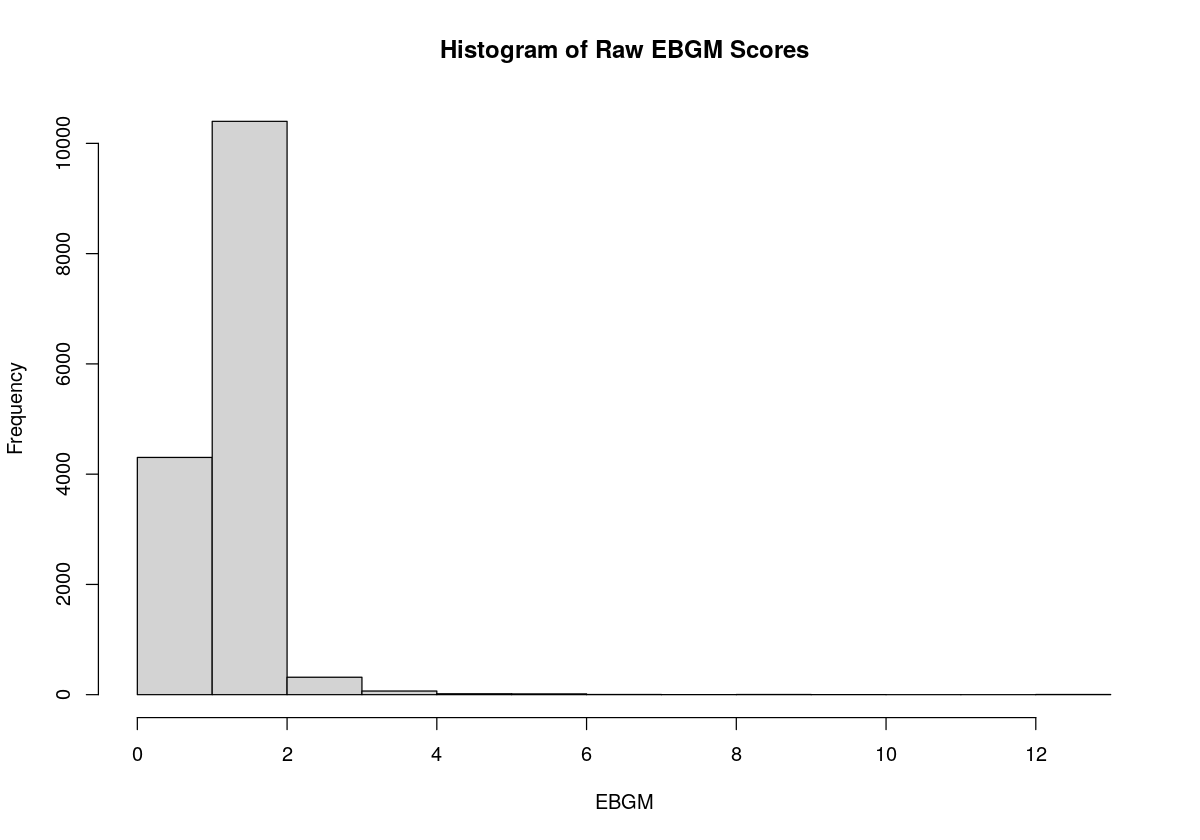

In [34]:
summary(ebout)

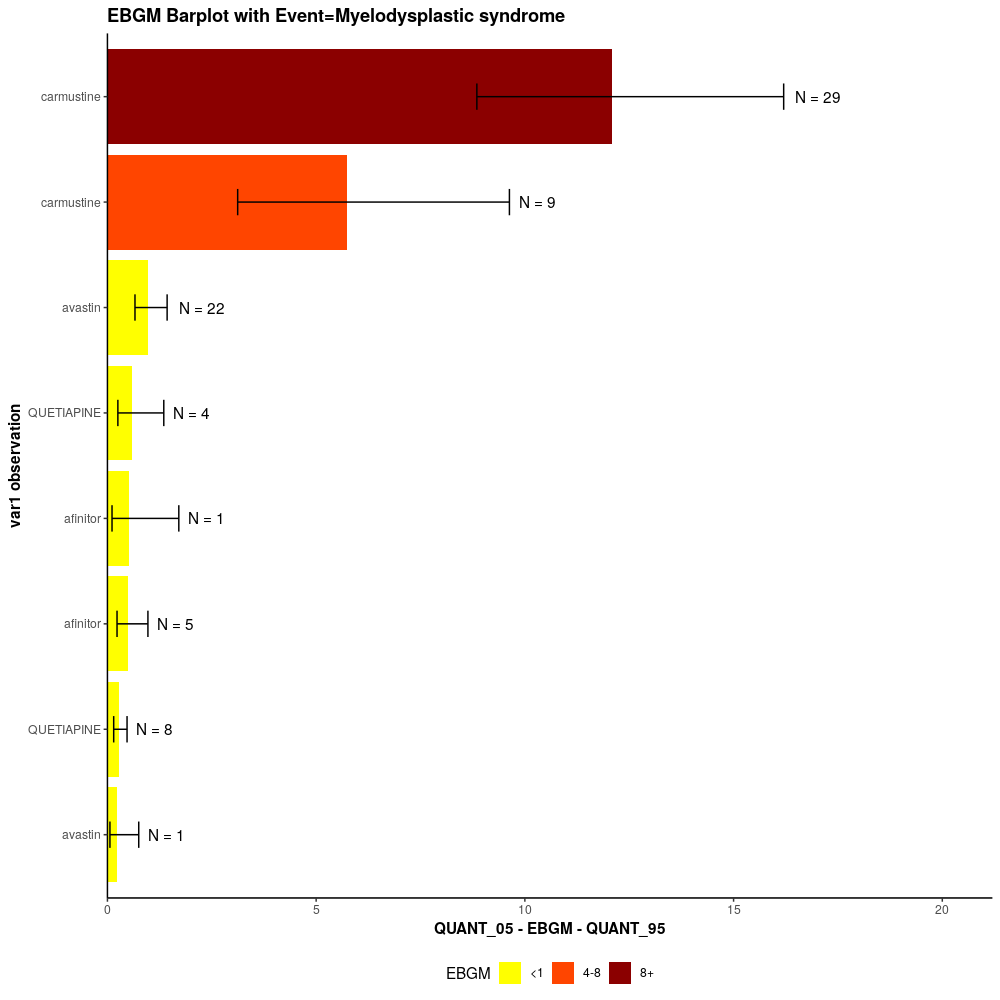

In [45]:
plot(ebout, event="Myelodysplastic syndrome",cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

## Extension

- We have stratified data based on gender and age. We can further augment the analysis to determine, if the adverse events are affecting a specific age/gender category.

- Further hyper parameter optimisation

- Some events have similar texts but are treated as separate events. We can use MEDDRA dictionoary (e.g HLT/HLGT) etc to standardise. We can use some form of text distances to align them. (https://www.meddra.org/how-to-use/basics/hierarchy)

- The GPS model does not take into account product interaction. Multi-item Gamma Poisson Shrinker model  [[3]](#3) is currently used by FDA for this. 


## References

<a id="1">[1]</a> 
DuMouchel W, Pregibon D (2001). “Empirical Bayes Screening for Multi-item Associations.” In Proceedings of the Seventh ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, KDD ’01, pp. 67-76. ACM, New York, NY, USA. ISBN 1-58113-391-X. https://doi.org/10.1145/502512.502526


<a id="2">[2]</a> 
Canida T, Ihrie J (2017). “openEBGM: An R Implementation of the Gamma-Poisson Shrinker Data Mining Model.” The R Journal, 9(2), 499-519. https://journal.r-project.org/archive/2017/RJ-2017-063/index.html

<a id="3">[3]</a> 
Bate A, Evans, S. Quantitative signal detection using spontaneous ADR reporting. Pharmacoepidemiol and Drug Saf 2009 Jun;18(6):427-36. doi: 10.1002/pds.1742.